In [2]:
import numpy as np
from dolly_zoom import *
import os
import imageio
import matplotlib.pyplot as plt

# 1
# (a)
def rotY(theta):
    R_y = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    return R_y

def generate_gif():
    n_frames = 30
    if not os.path.isdir("frames"):
        os.mkdir("frames")
    fstr = "frames/%d.png"
    for i,theta in enumerate(np.arange(0,2*np.pi,2*np.pi/n_frames)):
        fname = fstr % i
        renderCube(f=15, t=(0,0,3), R=rotY(theta))
        plt.savefig(fname)
        plt.close()

    with imageio.get_writer("cube.gif", mode='I') as writer:
        for i in range(n_frames):
            frame = plt.imread(fstr % i)
            writer.append_data(frame)
            os.remove(fstr%i)
            
    os.rmdir("frames")
    
generate_gif()

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

In [2]:
# (b)
def rotX(theta):
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])
    return R_x

theta = np.pi / 4

# (b)-(a)
fname = "X then Y"
renderCube(f=15, t=(0,0,3), R = rotY(theta) @ rotX(theta)) # X then Y
plt.savefig(fname)
plt.close()

# (b)-(b)
fname = "Y then X"
renderCube(f=15, t=(0,0,3), R = rotX(theta) @ rotY(theta)) # Y then X
plt.savefig(fname)
plt.close()

In [3]:
# (c)
fname = "(c)"
renderCube(f=15, t=(0,0,3), R = rotX(np.arcsin(1/np.sqrt(3))) @ rotY(np.pi/4))
plt.savefig(fname)
plt.close()

In [4]:
# (d)
fname = "(d)"
renderCube(f=np.inf, t=(0,0,3), R = rotX(np.arcsin(1/np.sqrt(3))) @ rotY(np.pi/4))
plt.savefig(fname)
plt.close()

In [5]:
# 2 Task 1
def split_image(img_dir):
    tri = plt.imread(img_dir)
    H, W = tri.shape
    h = int(H/3)
    channels = np.dstack((tri[2*h:3*h-10],tri[h+5:2*h-5],tri[10:h]))
    plt.imsave(img_dir[:-4]+'_wonky.jpg', channels[:,20:-20])
    return channels[:,20:-20]
split_image("prokudin-gorskii/00125v.jpg")

array([[[ 26,  33, 253],
        [ 23,  26, 252],
        [ 20,  25, 255],
        ...,
        [ 87,  24,   6],
        [ 97,  25,   4],
        [149,  24,   4]],

       [[ 25,  35, 118],
        [ 23,  26, 116],
        [ 19,  23, 118],
        ...,
        [ 93,  13,   6],
        [107,  14,   4],
        [161,  14,   4]],

       [[ 25,  32,   0],
        [ 23,  24,   0],
        [ 20,  21,   1],
        ...,
        [ 90,  13,   7],
        [101,  14,   6],
        [144,  15,   6]],

       ...,

       [[ 13,  25,  26],
        [ 11,  28,  25],
        [ 10,  23,  21],
        ...,
        [ 22,  83,  25],
        [ 19,  78,  29],
        [ 18,  95,  29]],

       [[  0,  26,  25],
        [  0,  28,  24],
        [  0,  22,  21],
        ...,
        [ 10,  90,  25],
        [  6,  83,  27],
        [  3, 109,  28]],

       [[  0,  27,  25],
        [  3,  27,  23],
        [  4,  22,  21],
        ...,
        [  0,  97,  26],
        [  0,  81,  26],
        [  0,  92,  27]]

In [6]:
# Task 2
def dot_product(C1,C2):
    C1 = C1 / np.linalg.norm(C1)
    C2 = C2 / np.linalg.norm(C2)
    return np.dot(C1.reshape(-1),C2.reshape(-1))

def roll_x_y(channel,x,y):
    return np.roll(np.roll(channel, x, axis = 0), y, axis = 1)

def align_channel(C1, C2):
    max_product = -1
    x = 0
    y = 0
    for i in range(-15,16):
        for j in range(-15,16):
            current_product = dot_product(roll_x_y(C1, i, j), C2)
            if current_product > max_product:
                x = i
                y = j
                max_product = current_product
    print("x={},y={}".format(x,y))
    return roll_x_y(C1, x, y), x, y

pics = ["prokudin-gorskii/" + pic for pic in os.listdir("prokudin-gorskii/") if not pic.endswith('_wonky.jpg') and not pic.endswith('aligned.jpg')]
pics.append('efros_tableau.jpg')
for pic in pics:
    print("Picture = {}".format(pic))
    channels = split_image(pic)
    channels[:,:,1], _, _ = align_channel(channels[:,:,1], channels[:,:,0])
    channels[:,:,2], _, _ = align_channel(channels[:,:,2], channels[:,:,0])
    plt.imsave(pic[:-4]+'aligned.jpg', channels)


Picture = prokudin-gorskii/00351v.jpg
x=-4,y=-1
x=-3,y=-1
Picture = prokudin-gorskii/00398v.jpg
x=-1,y=-1
x=-1,y=-4
Picture = prokudin-gorskii/00153v.jpg
x=-2,y=-1
x=-7,y=0
Picture = prokudin-gorskii/00149v.jpg
x=0,y=0
x=1,y=-1
Picture = prokudin-gorskii/00125v.jpg
x=1,y=0
x=0,y=-1
Picture = prokudin-gorskii/01112v.jpg
x=0,y=-1
x=5,y=-1
Picture = efros_tableau.jpg
x=5,y=10
x=10,y=5


In [9]:
# Task 3
import cv2
def scale_down(high_res_img):
    H,W = high_res_img.shape[0:2]
    return cv2.resize(high_res_img, (int(W/2),int(H/2)))

In [8]:
pic = "seoul_tableau.jpg"
orig_channels = split_image(pic)
channels = scale_down(orig_channels)
channels[:,:,1], x1, y1 = align_channel(channels[:,:,1], channels[:,:,0])
channels[:,:,2], x2, y2 = align_channel(channels[:,:,2], channels[:,:,0])
orig_channels[:,:,1] = np.roll(orig_channels[:,:,1],(2*x1,2*y1),axis=(0,1))
orig_channels[:,:,2] = np.roll(orig_channels[:,:,2],(2*x2,2*y2),axis=(0,1))
channels = orig_channels
channels[:,:,1], x1, y1 = align_channel(channels[:,:,1], channels[:,:,0])
channels[:,:,2], x2, y2 = align_channel(channels[:,:,2], channels[:,:,0])
plt.imsave(pic[:-4]+'aligned.jpg', channels)

x=2,y=3
x=4,y=1
x=1,y=0
x=0,y=-1


In [9]:
pic = "vancouver_tableau.jpg"
orig_channels = split_image(pic)
channels = scale_down(orig_channels)
channels[:,:,1], x1, y1 = align_channel(channels[:,:,1], channels[:,:,0])
channels[:,:,2], x2, y2 = align_channel(channels[:,:,2], channels[:,:,0])
orig_channels[:,:,1] = np.roll(orig_channels[:,:,1],(2*x1,2*y1),axis=(0,1))
orig_channels[:,:,2] = np.roll(orig_channels[:,:,2],(2*x2,2*y2),axis=(0,1))
channels = orig_channels
channels[:,:,1], x1, y1 = align_channel(channels[:,:,1], channels[:,:,0])
channels[:,:,2], x2, y2 = align_channel(channels[:,:,2], channels[:,:,0])
plt.imsave(pic[:-4]+'aligned.jpg', channels)

x=2,y=11
x=9,y=6
x=0,y=0
x=0,y=0


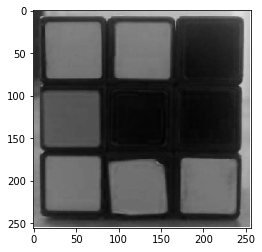

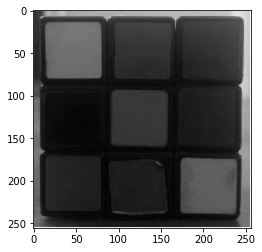

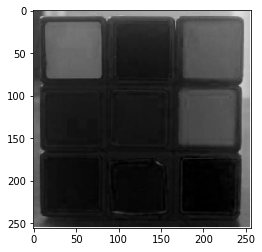

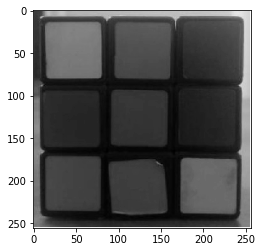

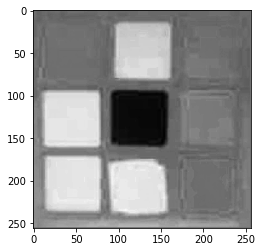

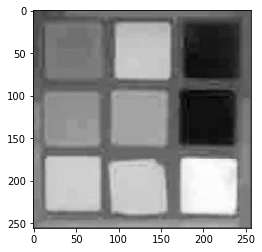

In [10]:
#3
def plot_RGB(RGB_img_dir):
    RGB_img = plt.imread(RGB_img_dir)
    plt.figure(0)
    plt.imshow(RGB_img[:,:,0],cmap='gray')
    plt.figure(1)
    plt.imshow(RGB_img[:,:,1],cmap='gray')
    plt.figure(2)
    plt.imshow(RGB_img[:,:,2],cmap='gray')
plot_RGB('indoor.png')
def plot_LAB(RGB_img_dir):
    RGB_img = plt.imread(RGB_img_dir)
    BGR_img = RGB_img[:,:,[2,1,0]]
    LAB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2LAB)
    plt.figure(3)
    plt.imshow(LAB_img[:,:,0],cmap='gray')
    plt.figure(4)
    plt.imshow(LAB_img[:,:,1],cmap='gray')
    plt.figure(5)
    plt.imshow(LAB_img[:,:,2],cmap='gray')
plot_LAB('indoor.png')

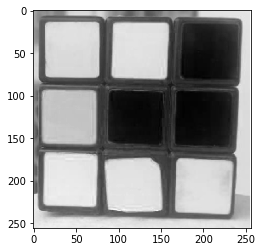

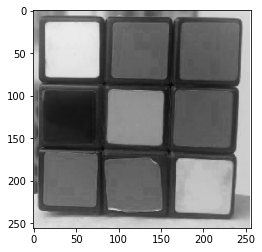

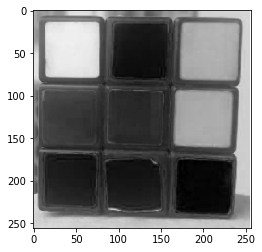

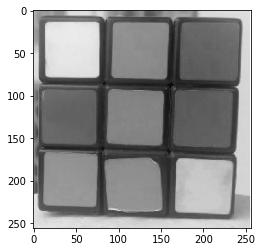

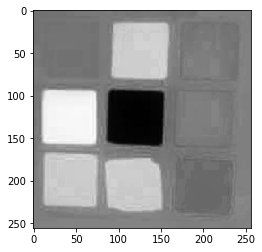

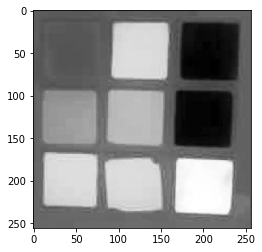

In [11]:
def plot_RGB(RGB_img_dir):
    RGB_img = plt.imread(RGB_img_dir)
    plt.figure(0)
    plt.imshow(RGB_img[:,:,0],cmap='gray')
    plt.figure(1)
    plt.imshow(RGB_img[:,:,1],cmap='gray')
    plt.figure(2)
    plt.imshow(RGB_img[:,:,2],cmap='gray')
plot_RGB('outdoor.png')
def plot_LAB(RGB_img_dir):
    RGB_img = plt.imread(RGB_img_dir)
    BGR_img = RGB_img[:,:,[2,1,0]]
    LAB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2LAB)
    plt.figure(3)
    plt.imshow(LAB_img[:,:,0],cmap='gray')
    plt.figure(4)
    plt.imshow(LAB_img[:,:,1],cmap='gray')
    plt.figure(5)
    plt.imshow(LAB_img[:,:,2],cmap='gray')
plot_LAB('outdoor.png')

In [14]:
#2 indoor.png and outdoor.png have very different L planes in LAB space. The L channel encodes the lightness.
#3
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("im1.jpg")
crop_img = img[200:1000, 400:1200,[2,1,0]]
resize_img = cv2.resize(crop_img, (256,256))

plt.imsave("im1_resized.jpg",resize_img)
# cv2.imshow("cropped", crop_img)
# img.shape

In [12]:
img = cv2.imread("im2.jpg")
# print(img.shape)
crop_img = img[200:1000, 400:1200,[2,1,0]]
print(crop_img.shape)
resize_img = cv2.resize(crop_img, (256,256))
plt.imsave("im2_resized.jpg",resize_img)

(800, 800, 3)
